In [9]:
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd



In [10]:

def parse_file(filepath, output_path):

    datafile = open(filepath, "r")
    writefile = open(output_path, "w")
    count = 0

    writefile.write("Weekday,Gender,Weight\n")
    while True:
        line = datafile.readline()
        if not line:
            break
        count += 1

        weekday = line[22]
        gender = line[474]
        weight = line[503:507]

        writefile.write("{},{},{}\n".format(weekday, gender, weight))


    datafile.close()
    writefile.close()

In [11]:
def average_weight_by_gender(dataset):
    return dataset.groupby("Gender").mean()

In [12]:
def gender_proportion(dataset):
    return dataset["Gender"].value_counts()

In [13]:
def gender_proportion_by_weekday(df, day):
    specific_day = df[df["Weekday"] == day]
    return gender_proportion(specific_day)



In [14]:
def gender_proportion_all_weekdays(dataset):
    days = []
    for i in range(1, 8):
        days.append(gender_proportion_by_weekday(dataset, i))
    return days

In [15]:
files = ["data/Nat2017.txt", "data/Nat2018.txt", "data/Nat2019.txt"]

for filepath in files:
    name = filepath.split("/")[1].split(".")[0]
    output_path = "output/" + name + ".csv"
    parse_file(filepath, output_path)

In [16]:
data_2017 = pd.read_csv("output/Nat2017.csv")
data_2018 = pd.read_csv("output/Nat2018.csv")
data_2019 = pd.read_csv("output/Nat2019.csv")



In [17]:
#Lars Kristian Kristiansen (lkr069) helped me out with plotting
def plot_proporsion(list):
    xpos = np.arange(len(list))
    plt.figure(figsize=(12, 5))
    plt.bar(xpos-0.15, [i[0] for i in list], width=0.3, label="Male")
    plt.bar(xpos+0.15, [i[1] for i in list], width=0.3, label="Female")
    plt.title("Gender Proportion by year")
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.xticks(xpos, ("2017", "2018", "2019"))
    plt.savefig("proportion.png", dpi=500, bbox_inches="tight")

In [18]:
#Lars Kristian Kristiansen (lkr069) helped me out with plotting

def plot_average_birth_weight(list):
    xpos = np.arange(len(list))
    plt.figure(figsize=(12, 5))
    plt.bar(xpos-0.15, [i[0] for i in list], width=0.3, label="Male")
    plt.bar(xpos+0.15, [i[1] for i in list], width=0.3, label="Female")
    plt.title("Average Birth Weight")
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.xticks(xpos, ("2017", "2018", "2019"))
    plt.savefig("avg_weight.png", dpi=500, bbox_inches="tight")

In [19]:
#Lars Kristian Kristiansen (lkr069) helped me out with plotting

def plot_births_weekday(list):
    xpos = np.arange(7)
    plt.figure(figsize=(12, 5))
    plt.bar(xpos-0.25, [i for i in list[0][0]], width=0.1, label="Male 2017")
    plt.bar(xpos-0.15, [i for i in list[0][1]], width=0.1, label="Female 2017")
    plt.bar(xpos-0.05, [i for i in list[1][0]], width=0.1, label="Male 2018")
    plt.bar(xpos+0.05, [i for i in list[1][1]], width=0.1, label="Female 2018")
    plt.bar(xpos+0.15, [i for i in list[2][0]], width=0.1, label="Male 2019")
    plt.bar(xpos+0.25, [i for i in list[2][1]], width=0.1, label="Female 2019")
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.xticks(xpos, ("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"))
    plt.savefig("birth_weekday.png", dpi=500, bbox_inches="tight")

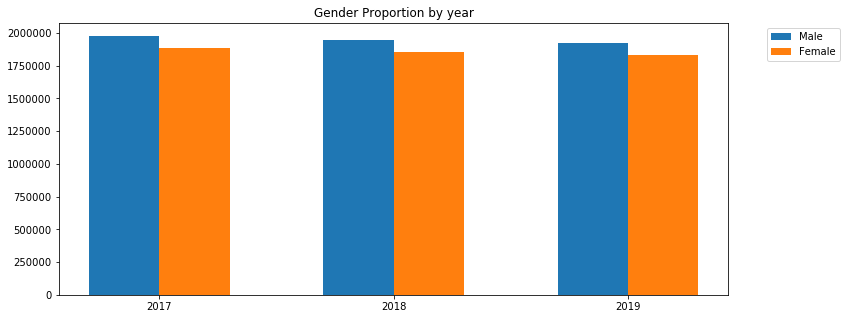

In [20]:

proportions = [gender_proportion(data_2017), gender_proportion(data_2018), gender_proportion(data_2019)]

proportion_by_year = []

for item in proportions:
    proportion_by_year.append((item["M"], item["F"]))

plot_proporsion(proportion_by_year)






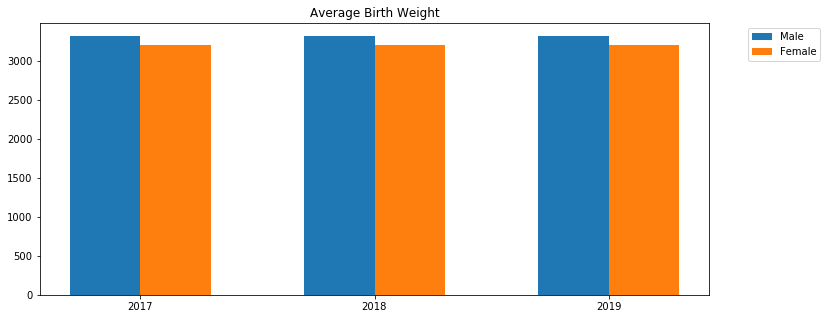

In [21]:
weights = [average_weight_by_gender(data_2017), average_weight_by_gender(data_2018), average_weight_by_gender(data_2019)]

weight_by_year = []

for item in weights:
    weight_by_year.append((item["Weight"][1], item["Weight"][0]))

plot_average_birth_weight(weight_by_year)


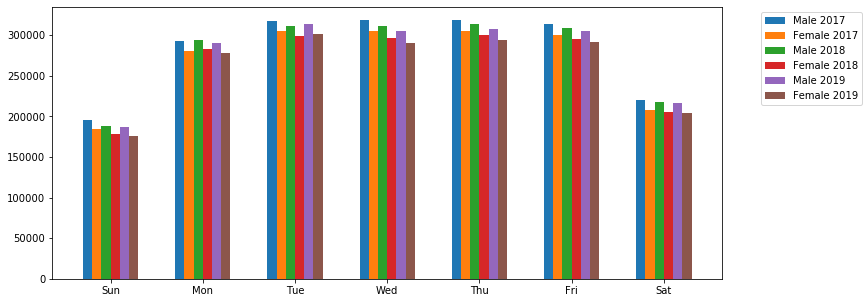

In [22]:
proportion_weekdays = [gender_proportion_all_weekdays(data_2017), gender_proportion_all_weekdays(data_2018), gender_proportion_all_weekdays(data_2019)]

test = proportion_weekdays[0]

result = []

for item in proportion_weekdays:
    week_male = []
    week_female = []
    for day in item:
        week_male.append(day["M"])
        week_female.append(day["F"])
    result.append((week_male, week_female))

plot_births_weekday(result)

